In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import json
import math
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.neighbors import NearestCentroid

In [60]:
list_of_devices = []

f = open('workload2.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Regions'])
    
df_by_hour = devicesDf.groupby('Hour')

#Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
X = np.array(devicesDf.drop(['Device_id'], axis = 1))

#linkage = sch.linkage(X, method  = "ward")

hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward', compute_distances=True)
hc.fit_predict(X)

clf = NearestCentroid()
clf.fit(X, hc.fit_predict(X))
#hc = linkage(X, method='ward', metric="euclidean")

#fl = fcluster(hc,6,criterion='maxclust')

NearestCentroid()

In [61]:
print(clf.centroids_)

[[ 12.05739577  54.5631068   20.52222182 114.82637244 212.82637244
  196.           0.32830232]
 [ 11.95789797 100.          75.67503108  33.50823085 120.32496892
  196.           1.27219419]
 [ 12.02337229 100.         189.91273579  91.91273579  27.80203203
  196.           2.43788506]
 [ 11.81884058  10.         137.07843888  39.77257279  58.92156112
  196.           1.89875958]
 [ 12.05626223  10.          53.50172063  44.49827937 142.49827937
  196.           1.04593592]
 [ 12.00645578  10.         215.20665684 117.20665684  20.80643374
  196.           2.69598629]]


In [62]:
print(len(hc.distances_))

15965


In [63]:
devicesDf['K-class'] = hc.labels_
devicesDf

Hour                             Device_id  Class_of_service  \
0        0  268730ee-d427-4381-a485-b5f254da7e5b                10   
1        0  38d2b5a4-2c89-47e8-ada7-cfe85e653c33               100   
2        0  a7c0fdf6-97bb-4987-a92d-76786e061e64                10   
3        0  fda9991e-ff0c-40c7-bbdd-a57f6c3d79d1               100   
4        0  bd1f98be-55ef-4a50-9d5f-84385fe60a21                10   
...    ...                                   ...               ...   
15961   23  566d908e-f172-44f6-93b5-b6b89e5ddea8               100   
15962   23  f4eb98b8-9b9e-4bf0-8ca5-00356e6cc291                10   
15963   23  0486969f-1c06-4ced-b57f-8236572f19d4               100   
15964   23  a7e38374-496b-466f-bfd4-d768b2e63e03                10   
15965   23  d2effe5f-e220-433e-9204-81043353cc52               100   

       Fog_latency_1  Fog_latency_2  Fog_latency_3  Cloud_latency   Regions  \
0         118.992363      20.992363      77.007637            196  1.714208   
1          77.093382      20.906618     118.906618            196  1.286667   
2         120.958843      22.958843      75.041157            196  1.734274   
3          11.592880      86.407120     184.407120            196  0.618295   
4         190.116448      92.116448       5.883552            196  2.439964   
...              ...            ...            ...            ...       ...   
15961      74.126325      23.873675     121.873675            196  1.256391   
15962      34.243208     132.243208     230.243208            196  0.150580   
15963     157.943651      59.943651      38.056349            196  2.111670   
15964      56.758690      41.241310     139.241310            196  1.079170   
15965     105.336848       7.336848      90.663152            196  1.574866   

       K-class  
0            3  
1            1  
2            3  
3            0  
4            5  
...        ...  
15961        1  
15962        0  
15963        2  
15964        4  
15965        1  

[15966 rows x 9 columns]

Latencia média =  24.42288115324755


c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

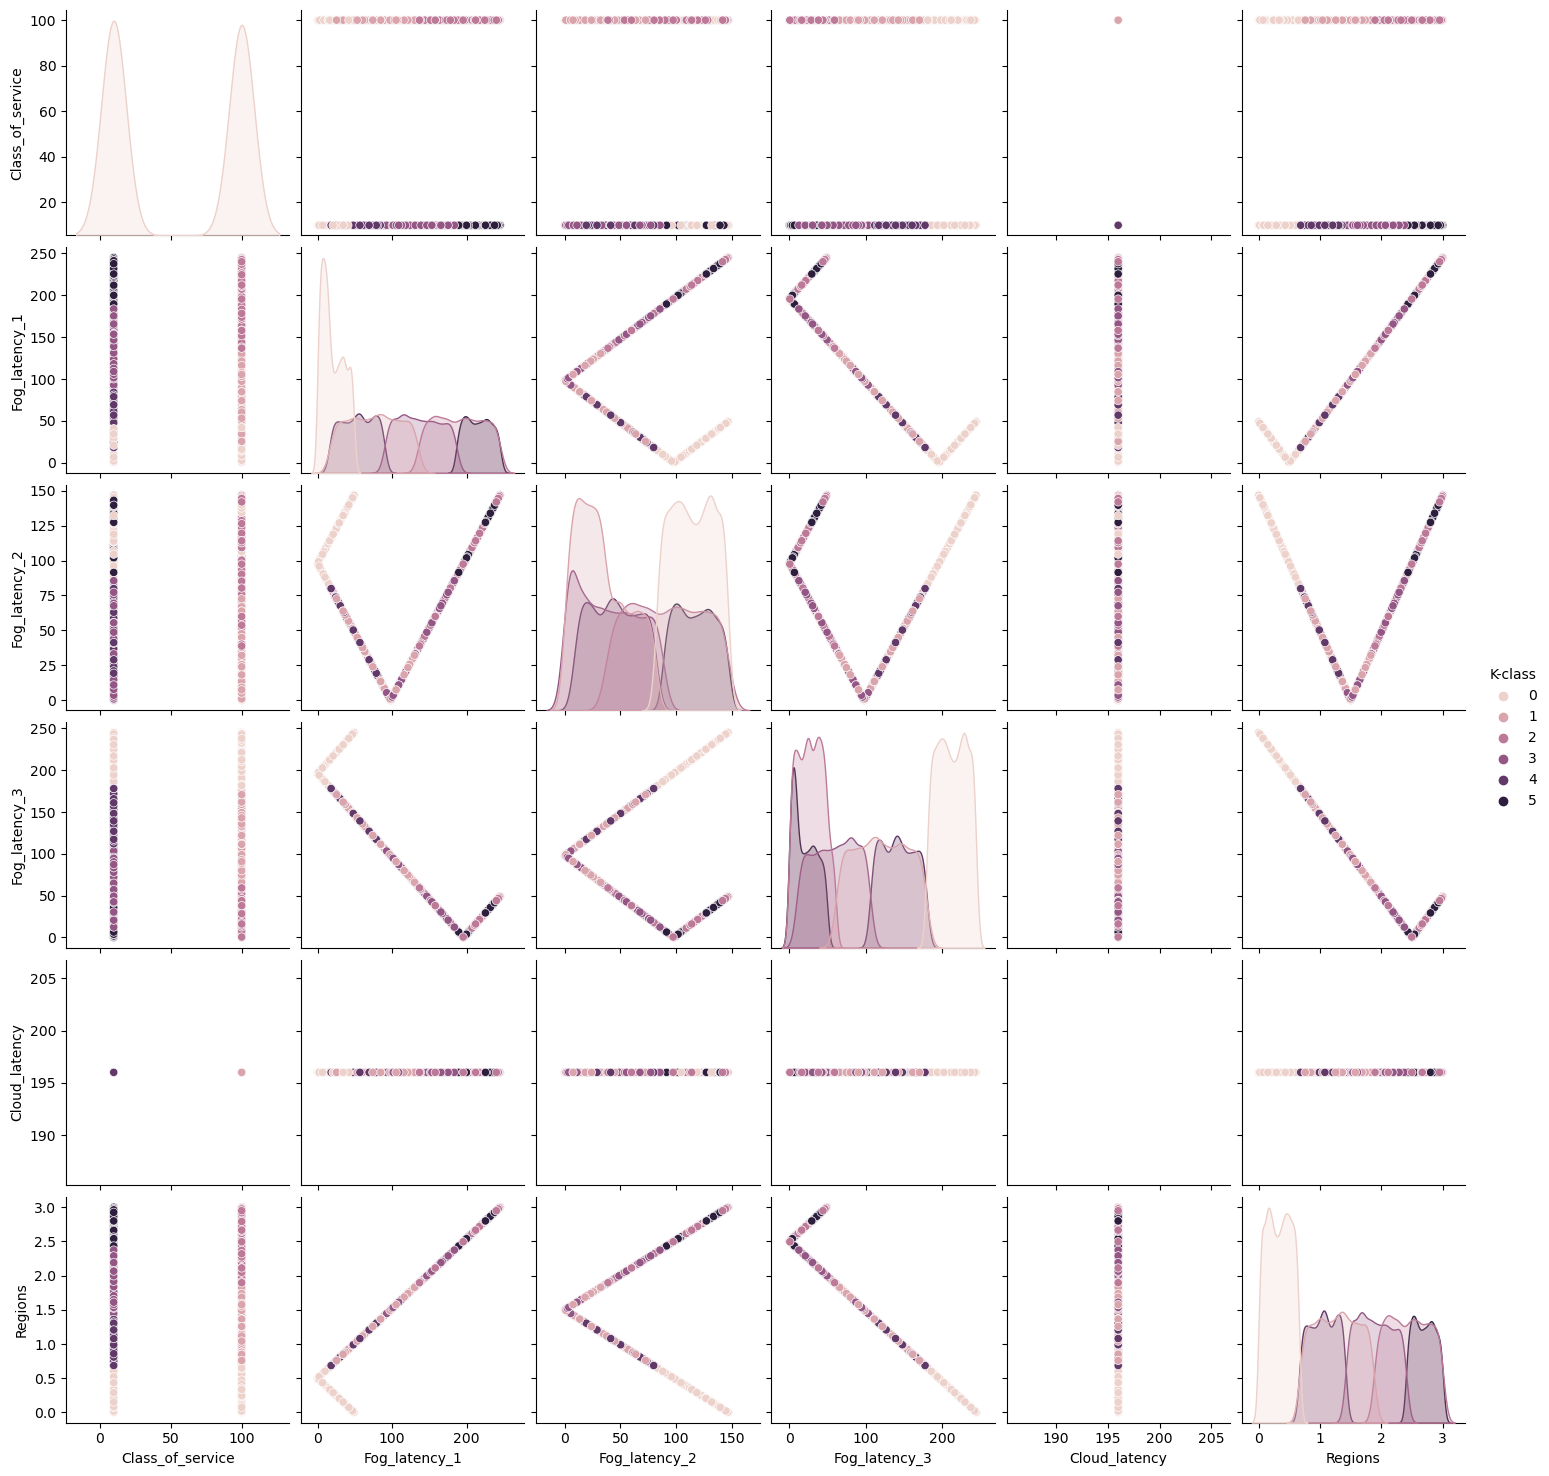

In [64]:
sum_smallest_latency = 0

for index in range(len(devicesDf)):
    smallest_latency = min([devicesDf["Fog_latency_1"].iloc[index], devicesDf["Fog_latency_2"].iloc[index], devicesDf["Fog_latency_3"].iloc[index]])
    sum_smallest_latency += smallest_latency

media_latency = sum_smallest_latency / devicesDf.shape[0]

print("Latencia média = ", media_latency)

sb.pairplot(devicesDf, hue="K-class")

<h1>ploting line graph standard and priority workload by time</h1>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0
quantidade dispositivos prioritarios =  9
quantidade dispositivos standard =  9
Menor latencia media =  12.242915399319477
latencia média por CoS =  110.24291539931949
Horário =  1
quantidade dispositivos prioritarios =  18
quantidade dispositivos standard =  18
Menor latencia media =  11.081143524019652
latencia média por CoS =  109.08114352401964
Horário =  2
quantidade dispositivos prioritarios =  35
quantidade dispositivos standard =  35
Menor latencia media =  10.058144537394055
latencia média por CoS =  108.05814453739406
Horário =  3
quantidade dispositivos prioritarios =  64
quantidade dispositivos standard =  64
Menor latencia media =  11.908596390403213
latencia média por CoS =  109.90859639040322
Horário =  4
quantidade dispositivos prioritarios =  108
quantidade dispositivos standard =  108
Menor latencia media =  12.841872209440078
latencia média por CoS =  110.8418722094401

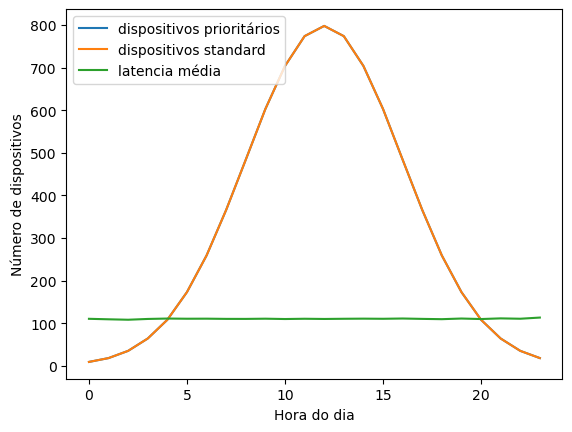

In [65]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import AgglomerativeClustering 

list_of_devices = []

f = open('workload2.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Regions'])
    
df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0

    for index in range(len(df_by_hour[str(i)])):
        if df_by_hour[str(i)]['Class_of_service'].iloc[index] == 100:
            smallest_latency = min([df_by_hour[str(i)]["Fog_latency_1"].iloc[index], df_by_hour[str(i)]["Fog_latency_2"].iloc[index], df_by_hour[str(i)]["Fog_latency_3"].iloc[index]])
            sum_smallest_latency += smallest_latency
            num_priority += 1
            latency_by_priority += smallest_latency
        else:
            num_standard += 1
            latency_by_priority += df_by_hour[str(i)]['Cloud_latency'].iloc[index]

    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    media_smallest_latency = sum_smallest_latency / df_by_hour[str(i)].shape[0]
    X = np.array(df_by_hour[str(i)].drop(['Device_id', 'Hour'], axis = 1))

    #aplicação do Ward Linkage
    hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')
    hc.fit_predict(X)

    df_by_hour[str(i)]['K-class'] = hc.labels_

    print("quantidade dispositivos prioritarios = ", num_priority)
    print("quantidade dispositivos standard = ", num_standard)

    print("Menor latencia media = ", media_smallest_latency)
    print("latencia média por CoS = ", media_priority_latency)

    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()

## Function: alocation_by_priority<br>
Devices alocation based on priority of execution.<br>
Priority devices are connected to the fog nodes and standard devices are connected to the cloud processing node.

### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [66]:
def alocation_by_priority(devices_regions, processing_nodes):
    latency_by_priority = 0
    standard_latency = 0
    num_priority = 0
    num_standard = 0
    package_size = 1966*(10**6)
    data_link_capacity = 10 * (10**9)
    transmission_latency = package_size / data_link_capacity

    print("Transmission latency: ", transmission_latency)

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if devices_regions[int(region)][index]["Class_of_service"] == 100 and len(processing_nodes[int(region)].connected_devices) < processing_nodes[int(region)].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
            else:
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])

    for region in range(len(processing_nodes)):
        for devices in processing_nodes[region].connected_devices:
            fog_node_id = "Fog_latency_" + str(region+1)
            if devices["Class_of_service"] == 100:
                num_priority += 1
                if region == 3:
                    latency_by_priority += devices["Cloud_latency"] + transmission_latency
                else:
                    latency_by_priority += devices[fog_node_id] + transmission_latency
            elif devices["Class_of_service"] == 10:
                num_standard += 1
                if region == 3:
                    standard_latency += devices["Cloud_latency"] + transmission_latency
                else:
                    standard_latency += devices[fog_node_id] + transmission_latency
    
    return latency_by_priority, standard_latency, num_priority, num_standard

## Function: fog_first_alocation<br>
Fog first alocation aims to use all capacity of the fog nodes before starts to use the cloud processing node.<br>
Devices that are standard and are connected to the fog node can be relocated to the cloud if a priority user needs to processed in the fog node.

### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [67]:
def fog_first_alocation(devices_regions, processing_nodes):
    latency_by_priority = 0
    standard_latency = 0
    num_priority = 0
    num_standard = 0
    package_size = 1966*(10**6)
    data_link_capacity = 10 * (10**9)
    transmission_latency = package_size / data_link_capacity
    
    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            fog_node_id = "Fog_latency_" + str(region+1)
            if len(processing_nodes[region].connected_devices) < processing_nodes[region].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
            else:
                # search for no_priority device connected to fog node
                non_priority_in_fog = False
                for device_index in range(len(processing_nodes[region].connected_devices)):
                    if processing_nodes[region].connected_devices[device_index]["Class_of_service"] == 10:
                        non_priority_in_fog = True
                        no_priority_device = processing_nodes[region].connected_devices[device_index]
                        
                        # disconnect device from fog node
                        processing_nodes[region].connected_devices.pop(device_index)
                        
                        # connect no-priority device on cloud node    
                        processing_nodes[-1].connected_devices.append(
                            no_priority_device)

                        # connect new priority device on the fog node
                        processing_nodes[region].connected_devices.append(devices_regions[region][index])
                        break
                # if no no-priority device is found, just connect to the cloud
                if non_priority_in_fog == False:
                    processing_nodes[-1].connected_devices.append(
                        devices_regions[region][index])

    for region in range(len(processing_nodes)):
        for devices in processing_nodes[region].connected_devices:
            fog_node_id = "Fog_latency_" + str(region+1)
            if devices["Class_of_service"] == 100:
                num_priority += 1
                if region == 3:
                    latency_by_priority += devices["Cloud_latency"] + transmission_latency
                else:
                    latency_by_priority += devices[fog_node_id] + transmission_latency
            elif devices["Class_of_service"] == 10:
                num_standard += 1
                if region == 3:
                    standard_latency += devices["Cloud_latency"] + transmission_latency
                else:
                    standard_latency += devices[fog_node_id] + transmission_latency

    print("numero prioritarios: ", num_priority)
    print("numero standard: ", num_standard)
    return latency_by_priority, standard_latency, num_priority, num_standard

## Function: alocation_cloud_only<br>
Cloud only aims to use only the processing capacity of the cloud node not caring about its processing capacity. If the demand is greater, devices are alocated to a processing queue.
### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [68]:
def alocation_cloud_only(devices_regions, processing_nodes):
    latency_by_priority = 0
    standard_latency = 0
    num_priority = 0
    num_standard = 0
    package_size = 1966*(10**6)
    data_link_capacity = 10 * (10**9)
    transmission_latency = package_size / data_link_capacity

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if len(processing_nodes[-1].connected_devices) < processing_nodes[-1].device_capacity:
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])
            else:
                non_priority_processing = False
                for device_index in range(len(processing_nodes[-1].connected_devices)):
                    if processing_nodes[-1].connected_devices[device_index]["Class_of_service"] == 10:
                        non_priority_processing = True
                        no_priority_device = processing_nodes[-1].connected_devices[device_index]
                        # disconnect device from fog node
                        processing_nodes[-1].connected_devices.pop(device_index)
                        # connect no-priority device on cloud node  
                        processing_nodes[-1].queue_devices.append(
                            no_priority_device)
                        # connect new priority device on the fog node
                        processing_nodes[-1].connected_devices.append(devices_regions[region][index])

                        break
                
                # if no no-priority device is found, just connect to the cloud
                if non_priority_processing == False:
                    processing_nodes[-1].queue_devices.append(
                        devices_regions[region][index])


    count_devices = 0
    for devices in processing_nodes[-1].connected_devices:
        if devices["Class_of_service"] == 100:
            num_priority += 1
            latency_by_priority += devices["Cloud_latency"] + transmission_latency
        elif devices["Class_of_service"] == 10:
            num_standard += 1
            standard_latency += devices["Cloud_latency"] + transmission_latency

    for devices in processing_nodes[-1].queue_devices:
        if devices["Class_of_service"] == 100:
            num_priority += 1
            count_devices += 1
            latency_by_priority += devices["Cloud_latency"] + (count_devices * 100) + transmission_latency
        elif devices["Class_of_service"] == 10:
            num_standard += 1
            count_devices += 1
            standard_latency += devices["Cloud_latency"] + (count_devices * 100) + transmission_latency

    
    return latency_by_priority, standard_latency, num_priority, num_standard

## Function: alocation_fog_only<br>
Fog only aims to use only the processing capacity of the fog node not caring about its processing capacity. If the demand is greater, devices are alocated to a processing queue.
### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [69]:
def alocation_fog_only(devices_regions, processing_nodes):
    latency_by_priority = 0
    standard_latency = 0
    num_priority = 0
    num_standard = 0
    package_size = 1966*(10**6)
    data_link_capacity = 10 * (10**9)
    transmission_latency = package_size / data_link_capacity

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if len(processing_nodes[region].connected_devices) < processing_nodes[region].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
            else:
                non_priority_processing = False
                for device_index in range(len(processing_nodes[region].connected_devices)):
                    if processing_nodes[region].connected_devices[device_index]["Class_of_service"] == 10:
                        non_priority_processing = True
                        no_priority_device = processing_nodes[region].connected_devices[device_index]
                        # disconnect device from fog node
                        processing_nodes[region].connected_devices.pop(device_index)
                        # connect no-priority device on cloud node    
                        processing_nodes[region].queue_devices.append(
                            no_priority_device)
                        # connect new priority device on the fog node
                        processing_nodes[region].connected_devices.append(devices_regions[region][index])
                        break
                
                if non_priority_processing == False:
                    # if no no-priority device in found, just connect to the cloud
                    processing_nodes[region].queue_devices.append(
                        devices_regions[region][index])


    for region in range(len(processing_nodes) - 1):
        count_devices = 0
        fog_node_id = "Fog_latency_" + str(region+1)
        for devices in processing_nodes[region].connected_devices:
            if devices["Class_of_service"] == 100:
                num_priority += 1
                latency_by_priority += devices[fog_node_id] + transmission_latency
            else:
                standard_latency += devices[fog_node_id] + transmission_latency
                num_standard += 1
        for devices in processing_nodes[region].queue_devices:
            print(devices)
            if devices["Class_of_service"] == 100:
                num_priority += 1
                count_devices += 1
                latency_by_priority += devices[fog_node_id] + (count_devices * 100) + transmission_latency
                print("queue devices: ", count_devices)
                print("latency queued: ", latency_by_priority)
            else:
                num_standard += 1
                count_devices += 1
                standard_latency += devices[fog_node_id] + (count_devices * 100) + transmission_latency

    return latency_by_priority, standard_latency, num_priority, num_standard

### Clustering and getting ready for alocation processes

In [70]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import AgglomerativeClustering 
import utilities
import time
import timeit

list_of_devices = []

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

devices_regions_by_hour = []

f = open('workload2.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        for fog_latency in range(len(t['latency'])):
            device.append(t['latency'][fog_latency])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service',
                         'Fog_latency_1', 'Fog_latency_2', 'Fog_latency_3', 'Cloud_latency', 'Regions'])

df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))

# loop by hour of the workload database
for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)

    # removing some unused columns
    X = np.array(df_by_hour[str(i)].drop(
        ['Device_id', 'Hour'], axis=1))

    #aplicação do Ward Linkage
    hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward', compute_distances=True)
    y_hc = hc.fit_predict(X)
    # add cluster label to each device
    df_by_hour[str(i)]['K-class'] = y_hc

    clf = NearestCentroid()
    clf.fit(X, y_hc)

    centers = clf.centroids_
    
    # get region centroid for each cluster and put it on a list with the cluster label
    # gonna be used to define the processing node each device will go depending of the cluster they're in
    ordered_clusters = []
    for cluster_index in range(len(centers)):
        # hardcoded -1 - last element on the centers is the centroid of the region
        ordered_clusters.append((centers[cluster_index][-1], cluster_index))

    # sort list of centroid and label of each cluster by the centroid
    ordered_clusters.sort()
    print(ordered_clusters)

    # list of devices for each region
    devices_regions = []
    devices_region_1 = []
    devices_region_2 = []
    devices_region_3 = []

    # loop through all devices in this hour
    # and stores than in its own region to be connected
    for devices in range(len(df_by_hour[str(i)])):
        device = df_by_hour[str(i)]['K-class'].iloc[devices]

        # ordered_cluster getting the index of the k-class refering to each region
        if device == ordered_clusters[0][1] or device == ordered_clusters[1][1]:
            devices_region_1.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[2][1] or device == ordered_clusters[3][1]:
            devices_region_2.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[4][1] or device == ordered_clusters[5][1]:
            devices_region_3.append(df_by_hour[str(i)].iloc[devices])

    devices_regions.append(devices_region_1)
    devices_regions.append(devices_region_2)
    devices_regions.append(devices_region_3)

    devices_regions_by_hour.append(devices_regions)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0
[(0.41088417110875436, 1), (0.9474039939082773, 4), (1.040280084203923, 3), (1.7560958402002016, 0), (2.6646086725190354, 5), (2.6700392811830667, 2)]
Horário =  1
[(0.2934522072580267, 5), (0.3287378617076201, 2), (1.215608442343433, 4), (1.4390893852764979, 1), (1.8793415749688835, 3), (2.653505340810096, 0)]
Horário =  2
[(0.3784969560862039, 1), (0.461971504310954, 2), (1.294289701087995, 5), (1.3939099764613607, 3), (1.9993093419883992, 4), (2.495844518143822, 0)]
Horário =  3
[(0.50906271017508, 0), (1.2497263238712724, 1), (1.5987768598714862, 4), (1.9814537048832734, 5), (2.460388175767508, 2), (2.704185294771411, 3)]
Horário =  4
[(0.34808206714661716, 5), (0.4503964550012459, 2), (1.2314207678930533, 3), (1.5399988842195256, 1), (1.9656699148595098, 4), (2.5911127502108635, 0)]
Horário =  5
[(0.43057245693674057, 3), (0.46668484960481893, 2), (1.4089536956009154, 5), (1.4352311

### Alocation by priority

Hour:  0
Transmission latency:  0.1966
Latency by priority:  254.6439518248113  num_priority:  9
Latencia media:  28.293772424979032
Latency cloud:  1765.7694  num_standard:  9
Latencia standard media:  196.1966
Hour:  1
Transmission latency:  0.1966
Latency by priority:  420.37795639161294  num_priority:  18
Latencia media:  23.354330910645164
Latency cloud:  3531.538800000001  num_standard:  18
Latencia standard media:  196.19660000000007
Hour:  2
Transmission latency:  0.1966
Latency by priority:  740.006488284774  num_priority:  35
Latencia media:  21.143042522422114
Latency cloud:  6866.881000000005  num_standard:  35
Latencia standard media:  196.19660000000013
Hour:  3
Transmission latency:  0.1966
Latency by priority:  2625.4321221987952  num_priority:  64
Latencia media:  41.022376909356176
Latency cloud:  12556.58239999999  num_standard:  64
Latencia standard media:  196.19659999999985
Hour:  4
Transmission latency:  0.1966
Latency by priority:  3214.175198337214  num_priorit

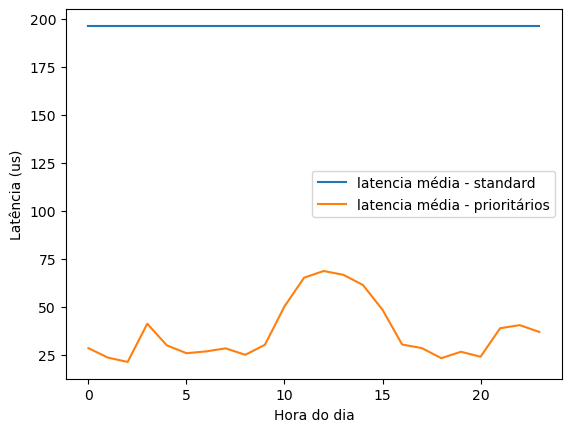

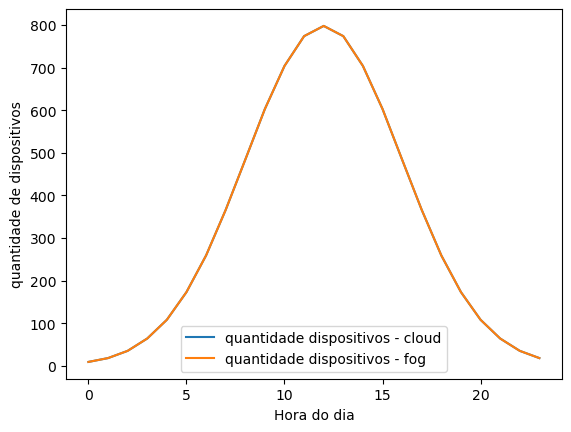

In [71]:
latency_list_fog_by_priority = []
latency_list_cloud_by_priority = []
all_devices_latency_mean_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    #######################################################
    # alocation of the devices in each region of fog node
    # ALOCATION BY PRIORITY #
    ######################################################
    latency_by_priority, cloud_latency, num_priority, num_standard = alocation_by_priority(devices_regions_by_hour[i], processing_nodes)
    #result = timeit.timeit(stmt='alocation_by_priority(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    #print("Alocation process time: ", result)

    media_priority_latency = latency_by_priority / num_priority
    media_cloud_latency = cloud_latency / num_standard
    all_devices_mean = (latency_by_priority + cloud_latency) / (num_priority + num_standard)
    
    print("Latency by priority: ", latency_by_priority, " num_priority: ", num_priority)
    print("Latencia media: ", media_priority_latency)

    print("Latency cloud: ", cloud_latency, " num_standard: ", num_standard)
    print("Latencia standard media: ", media_cloud_latency)
    latency_list_fog_by_priority.append(media_priority_latency)
    latency_list_cloud_by_priority.append(media_cloud_latency)
    all_devices_latency_mean_by_priority.append(all_devices_mean)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média - standard")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_by_priority, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['latencia média - standard', 'latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="quantidade dispositivos - cloud")
pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="quantidade dispositivos - fog")
pl.xlabel("Hora do dia")
pl.ylabel("quantidade de dispositivos")
pl.legend(['quantidade dispositivos - cloud', 'quantidade dispositivos - fog'])
pl.show()

### Alocation - Fog First

Hour:  0
numero prioritarios:  9
numero standard:  9
Latencia media prioritarios:  28.293772424979032
Latencia media standard:  27.37423974991022
Hour:  1
numero prioritarios:  18
numero standard:  18
Latencia media prioritarios:  23.354330910645164
Latencia media standard:  39.51547359312819
Hour:  2
numero prioritarios:  35
numero standard:  35
Latencia media prioritarios:  21.143042522422114
Latencia media standard:  30.493271278764613
Hour:  3
numero prioritarios:  64
numero standard:  64
Latencia media prioritarios:  41.022376909356176
Latencia media standard:  26.395495950576507
Hour:  4
numero prioritarios:  108
numero standard:  108
Latencia media prioritarios:  29.760881466085316
Latencia media standard:  24.835643843952393
Hour:  5
numero prioritarios:  173
numero standard:  173
Latencia media prioritarios:  25.68681487403209
Latencia media standard:  24.90930326665584
Hour:  6
numero prioritarios:  259
numero standard:  259
Latencia media prioritarios:  26.623221765931838
La

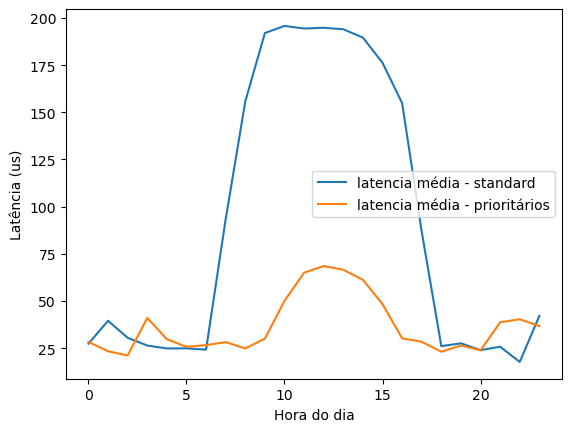

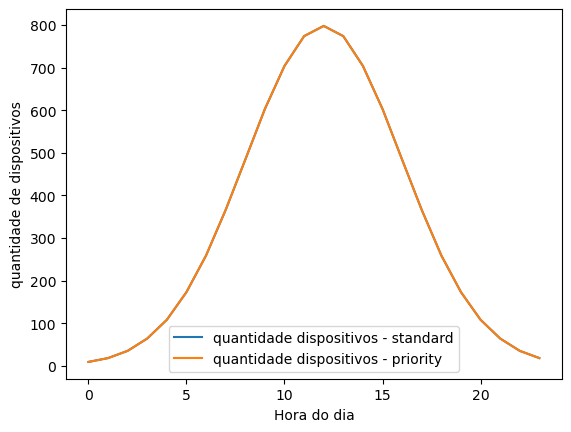

In [72]:
latency_list_fog_fog_first = []
latency_list_cloud_fog_first = []
all_devices_latency_mean_fog_first = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    #########################
    # ALOCATION - FOG FIRST #
    #########################
    latency_by_priority, cloud_latency, num_priority, num_standard = fog_first_alocation(devices_regions_by_hour[i], processing_nodes)
    #result = timeit.timeit(stmt='fog_first_alocation(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    #print("Alocation process time: ", result)

    media_priority_latency = latency_by_priority / num_priority
    media_cloud_latency = cloud_latency / num_standard  
    all_devices_mean = (latency_by_priority + cloud_latency) / (num_priority + num_standard)
    
    print("Latencia media prioritarios: ", media_priority_latency)
    print("Latencia media standard: ", media_cloud_latency)
    latency_list_fog_fog_first.append(media_priority_latency)
    latency_list_cloud_fog_first.append(media_cloud_latency)
    all_devices_latency_mean_fog_first.append(all_devices_mean)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média - standard")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_fog_first, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['latencia média - standard', 'latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="quantidade dispositivos - cloud")
pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="quantidade dispositivos - fog")
pl.xlabel("Hora do dia")
pl.ylabel("quantidade de dispositivos")
pl.legend(['quantidade dispositivos - standard', 'quantidade dispositivos - priority'])
pl.show()

### Alocation - Only Cloud

Hour:  0
Latency by priority:  1765.7694  num_priority:  9
Latencia media:  196.1966
Latency cloud:  1765.7694  num_standard:  9
Latencia standard media:  196.1966
Latencia media:  196.1966
Hour:  1
Latency by priority:  3531.538800000001  num_priority:  18
Latencia media:  196.19660000000007
Latency cloud:  3531.538800000001  num_standard:  18
Latencia standard media:  196.19660000000007
Latencia media:  196.19660000000007
Hour:  2
Latency by priority:  6866.881000000005  num_priority:  35
Latencia media:  196.19660000000013
Latency cloud:  6866.881000000005  num_standard:  35
Latencia standard media:  196.19660000000013
Latencia media:  196.19660000000013
Hour:  3
Latency by priority:  12556.58239999999  num_priority:  64
Latencia media:  196.19659999999985
Latency cloud:  12556.58239999999  num_standard:  64
Latencia standard media:  196.19659999999985
Latencia media:  196.19659999999985
Hour:  4
Latency by priority:  21189.23279999996  num_priority:  108
Latencia media:  196.196599

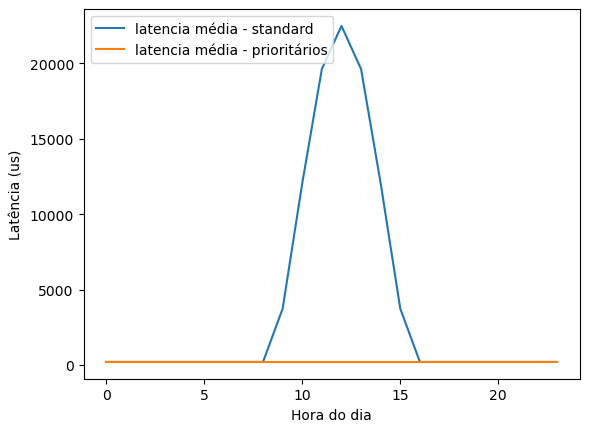

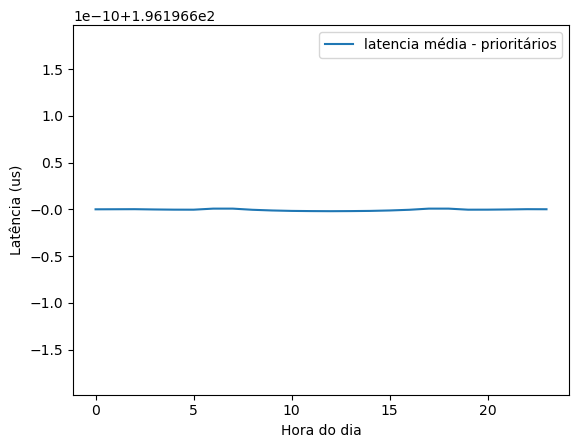

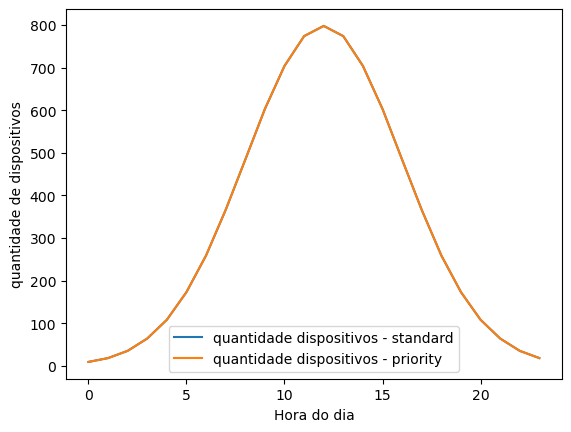

In [73]:
latency_list_fog_only_cloud = []
latency_list_cloud_only_cloud = []
all_devices_latency_mean_only_cloud = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    cloud_latency = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    ##########################
    # ALOCATION - ONLY CLOUD #
    ##########################
    latency_by_priority, cloud_latency, num_priority, num_standard = alocation_cloud_only(devices_regions_by_hour[i], processing_nodes)
    #result = timeit.timeit(stmt='alocation_cloud_only(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    #print("Alocation process time: ", result)


    media_priority_latency = latency_by_priority / num_priority
    media_cloud_latency = cloud_latency / num_standard
    all_devices_mean = (latency_by_priority + cloud_latency) / (num_priority + num_standard)
    
    print("Latency by priority: ", latency_by_priority, " num_priority: ", num_priority)
    print("Latencia media: ", media_priority_latency)

    print("Latency cloud: ", cloud_latency, " num_standard: ", num_standard)
    print("Latencia standard media: ", media_cloud_latency)
    
    print("Latencia media: ", media_priority_latency)
    latency_list_fog_only_cloud.append(media_priority_latency)
    latency_list_cloud_only_cloud.append(media_cloud_latency)
    all_devices_latency_mean_only_cloud.append(all_devices_mean)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_cloud, label="latencia média - standard")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['latencia média - standard', 'latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="quantidade dispositivos - fila")
pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="quantidade dispositivos - cloud")
pl.xlabel("Hora do dia")
pl.ylabel("quantidade de dispositivos")
pl.legend(['quantidade dispositivos - standard', 'quantidade dispositivos - priority'])
pl.show()

### Alocation - Only Fog

Hour:  0
Latency by priority:  254.6439518248113  num_priority:  9
Latencia media:  28.293772424979032
Latency cloud:  246.368157749192  num_standard:  9
Latencia standard media:  27.37423974991022
Latencia media:  28.293772424979032
Hour:  1
Latency by priority:  420.37795639161294  num_priority:  18
Latencia media:  23.354330910645164
Latency cloud:  711.2785246763075  num_standard:  18
Latencia standard media:  39.51547359312819
Latencia media:  23.354330910645164
Hour:  2
Latency by priority:  740.006488284774  num_priority:  35
Latencia media:  21.143042522422114
Latency cloud:  1067.2644947567615  num_standard:  35
Latencia standard media:  30.493271278764613
Latencia media:  21.143042522422114
Hour:  3
Latency by priority:  2625.4321221987952  num_priority:  64
Latencia media:  41.022376909356176
Latency cloud:  1689.3117408368964  num_standard:  64
Latencia standard media:  26.395495950576507
Latencia media:  41.022376909356176
Hour:  4
Latency by priority:  3214.175198337214  

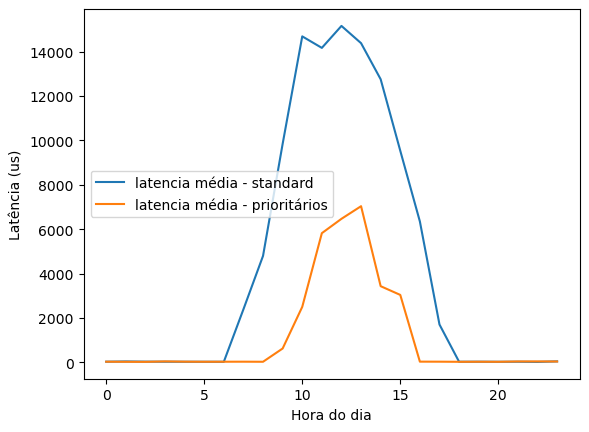

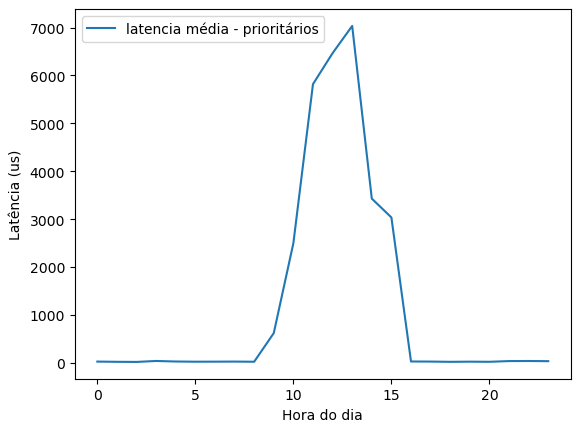

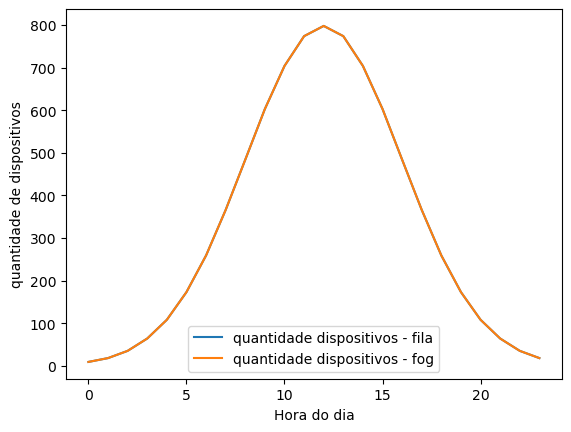

In [74]:
latency_list_fog_only_fog = []
latency_list_cloud_only_fog = []
all_devices_latency_mean_only_fog = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Hour: ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    ########################
    # ALOCATION - ONLY FOG #
    ########################
    latency_by_priority, cloud_latency, num_priority, num_standard = alocation_fog_only(devices_regions_by_hour[i], processing_nodes)
    #result = timeit.timeit(stmt='alocation_fog_only(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    #print("Alocation process time: ", result)

    media_priority_latency = latency_by_priority / num_priority
    media_cloud_latency = cloud_latency / num_standard
    all_devices_mean = (latency_by_priority + cloud_latency) / (num_priority + num_standard)

    print("Latency by priority: ", latency_by_priority, " num_priority: ", num_priority)
    print("Latencia media: ", media_priority_latency)

    print("Latency cloud: ", cloud_latency, " num_standard: ", num_standard)
    print("Latencia standard media: ", media_cloud_latency)
    
    print("Latencia media: ", media_priority_latency)
    latency_list_fog_only_fog.append(media_priority_latency)
    latency_list_cloud_only_fog.append(media_cloud_latency)
    all_devices_latency_mean_only_fog.append(all_devices_mean)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_fog, label="latencia média - standard")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_fog, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['latencia média - standard', 'latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_fog, label="latencia média - prioritários")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['latencia média - prioritários'])
pl.show()

pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="quantidade dispositivos - fila")
pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="quantidade dispositivos - fog")
pl.xlabel("Hora do dia")
pl.ylabel("quantidade de dispositivos")
pl.legend(['quantidade dispositivos - fila', 'quantidade dispositivos - fog'])
pl.show()

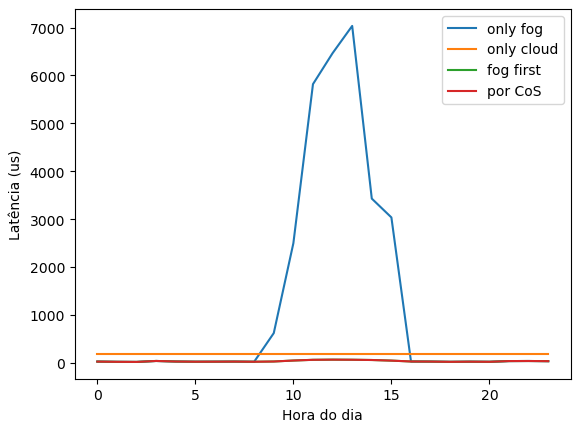

In [75]:
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_fog, label="latencia média - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_by_priority, label="latencia média - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['only fog', 'only cloud', 'fog first', 'por CoS'])
pl.show()

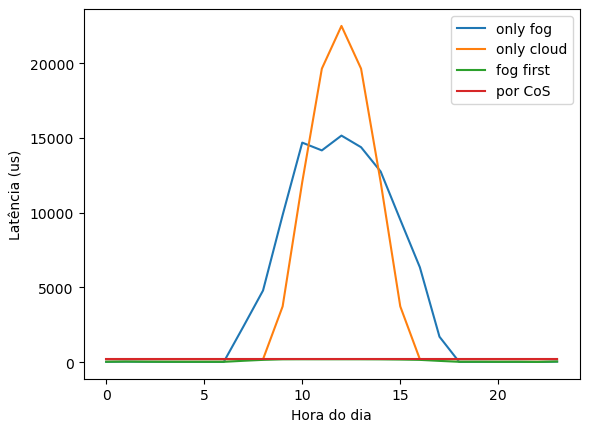

In [76]:
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_fog, label="latencia média - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_cloud, label="latencia média - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['only fog', 'only cloud', 'fog first', 'por CoS'])
pl.show()

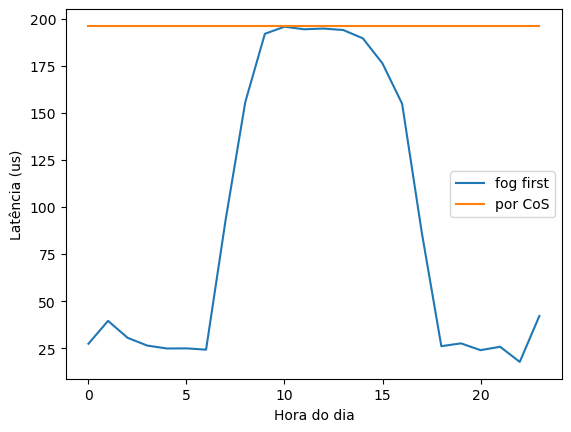

In [77]:
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['fog first', 'por CoS'])
pl.show()

In [78]:
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_only_fog, label="latencia média - only_fog")
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_only_cloud, label="latencia média - only cloud")
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_by_priority, label="latencia média - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['only fog', 'only cloud', 'fog first', 'por CoS'])
pl.show()

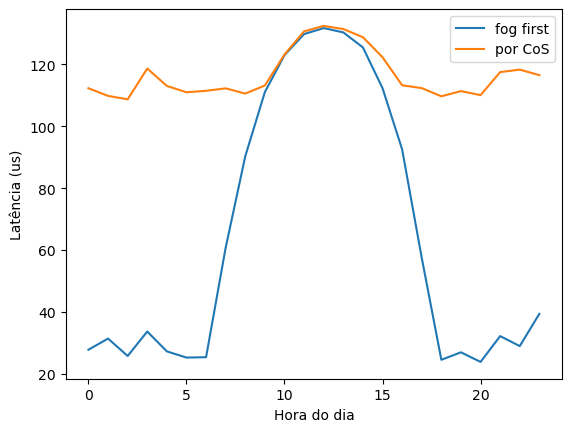

In [79]:
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_fog_first, label="latencia média - fog first")
pl.plot(list(range(len(df_by_hour))), all_devices_latency_mean_by_priority, label="latencia média - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['fog first', 'por CoS'])
pl.show()

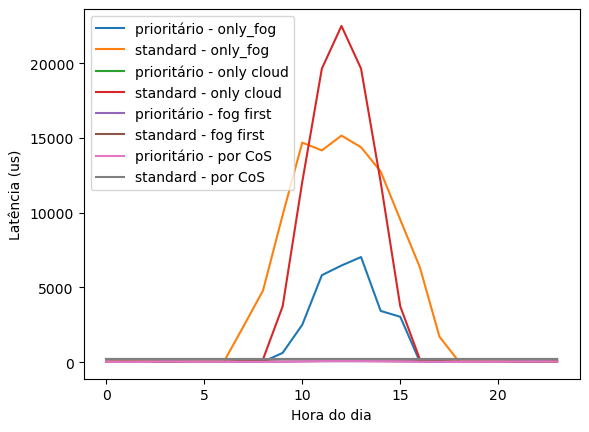

In [80]:
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_fog, label="latencia média | prioritário - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_fog, label="latencia média | standard - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média | prioritário - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_cloud, label="latencia média | standard - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_fog_first, label="latencia média | prioritário - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média | standard - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_by_priority, label="latencia média | prioritário - por CoS")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média | standard - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend(['prioritário - only_fog',
            'standard - only_fog',
            'prioritário - only cloud',
            'standard - only cloud',
            'prioritário - fog first', 
            'standard - fog first', 
            'prioritário - por CoS',
            'standard - por CoS'])
pl.show()

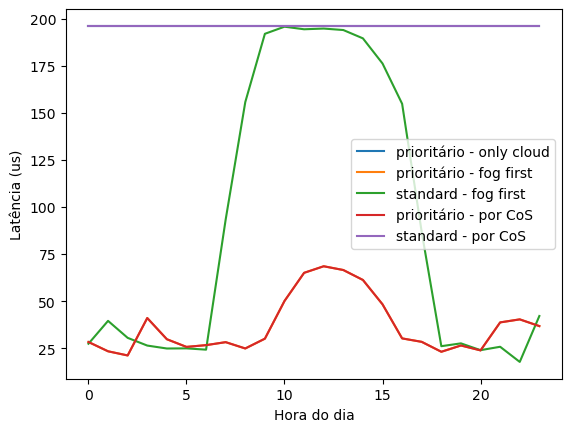

In [81]:
#pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_fog, label="latencia média | prioritário - only_fog")
#pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_fog, label="latencia média | standard - only_fog")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_only_cloud, label="latencia média | prioritário - only cloud")
#pl.plot(list(range(len(df_by_hour))), latency_list_cloud_only_cloud, label="latencia média | standard - only cloud")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_fog_first, label="latencia média | prioritário - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_fog_first, label="latencia média | standard - fog first")
pl.plot(list(range(len(df_by_hour))), latency_list_fog_by_priority, label="latencia média | prioritário - por CoS")
pl.plot(list(range(len(df_by_hour))), latency_list_cloud_by_priority, label="latencia média | standard - por CoS")
pl.xlabel("Hora do dia")
pl.ylabel("Latência (us)")
pl.legend([#'prioritário - only_fog',
#            'standard - only_fog',
            'prioritário - only cloud',
#            'standard - only cloud',
            'prioritário - fog first', 
            'standard - fog first', 
            'prioritário - por CoS',
            'standard - por CoS'])
pl.show()